<h1>Fundamentals of Data Visualization Final Project<h1>

<p> I chose to analyze a search and rescue dataset from the state of New York. The data is comprised of entries ranging from 2012 to 2022 and has over 5,000 data points. I will start my analysis from importing the dataset directly from data.gov. My goal for this project was to perform a general analysis of the data and break it down in an easy to follow set of visualizations that build on eachother to give the reader a comprehensive overview of what is going on in the dataset.<p>

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import folium

data = pd.read_csv('https://data.ny.gov/api/views/u6hu-h7p5/rows.csv?accessType=DOWNLOAD')
print(data.head)

<bound method NDFrame.head of      INCIDENT NUMBER  INCIDENT REGION RESPONSE TYPE INCIDENT START DATE  \
0     NY-2022-WS-347                4        Search          11/30/2022   
1     NY-2022-WS-157                6        Search          07/16/2022   
2     NY-2021-WS-324                9        Search          09/28/2021   
3     NY-2021-WS-274                7        Search          09/01/2021   
4     NY-2020-WS-007                5        Search          01/15/2020   
...              ...              ...           ...                 ...   
5409  NY-2019-WS-191                5        Search          08/01/2019   
5410  NY-2016-WS-008                6        Rescue          01/14/2016   
5411  NY-2013-WS-172                5        Search          08/21/2013   
5412  NY-2021-WS-014                6        Rescue          02/07/2021   
5413  NY-2017-WS-266                5        Rescue          09/22/2017   

     INCIDENT START TIME  SUBJECT NUMBER SUBJECT GENDER  SUBJECT AGE 

<p>After the data has been read in we will now clean it up by removing columns from the dataset that will not be used as well as identifying missing values.<p>

In [67]:
df = data[['INCIDENT NUMBER', 'INCIDENT REGION', 'RESPONSE TYPE',
                   'INCIDENT START DATE', 'INCIDENT START TIME', 'SUBJECT NUMBER',
                   'SUBJECT GENDER', 'SUBJECT AGE', 'SUBJECT STATE', 'SUBJECT COUNTRY',
                   'ACTIVITY', 'SITUATION', 'LOCATION FOUND LATITUDE',
                   'LOCATION FOUND LONGITUDE', 'LOCATION FOUND ELEVATION',
                   'FOUND IN SEARCH AREA', 'TECHNIQUE', 'NUMBER OF RANGERS INVOLVED']]

missing_values = df.isnull()
missing_counts = missing_values.sum()
print(missing_counts[missing_counts > 0])


SUBJECT GENDER              124
SUBJECT AGE                 161
SUBJECT STATE                 6
ACTIVITY                      2
SITUATION                     2
LOCATION FOUND LATITUDE       4
LOCATION FOUND LONGITUDE      4
LOCATION FOUND ELEVATION      4
TECHNIQUE                   106
dtype: int64


In [68]:
amended_df = df.fillna("Unknown")
missing_values_new = amended_df.isnull()
missing_counts_new = missing_values_new.sum()
print(missing_counts_new[missing_counts_new > 0])

Series([], dtype: int64)


<p>After identifying where the missing values are in the data I replaced any missing values with "Unknown" to better capture the missing data. This also prevents missing values from skewing the data.<p>

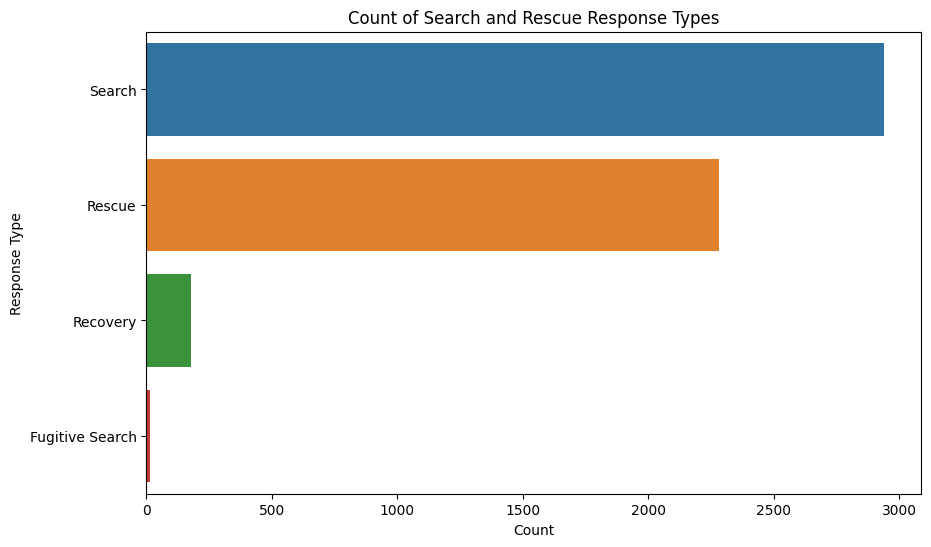

In [69]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='RESPONSE TYPE')
plt.xlabel('Count')
plt.ylabel('Response Type')
plt.title('Count of Search and Rescue Response Types')
plt.show()

<p>First, we will look at the distribution of incidents by response type. This indicated that search and rescue events make up the largest fraction of search and rescue responses in New York.<p>

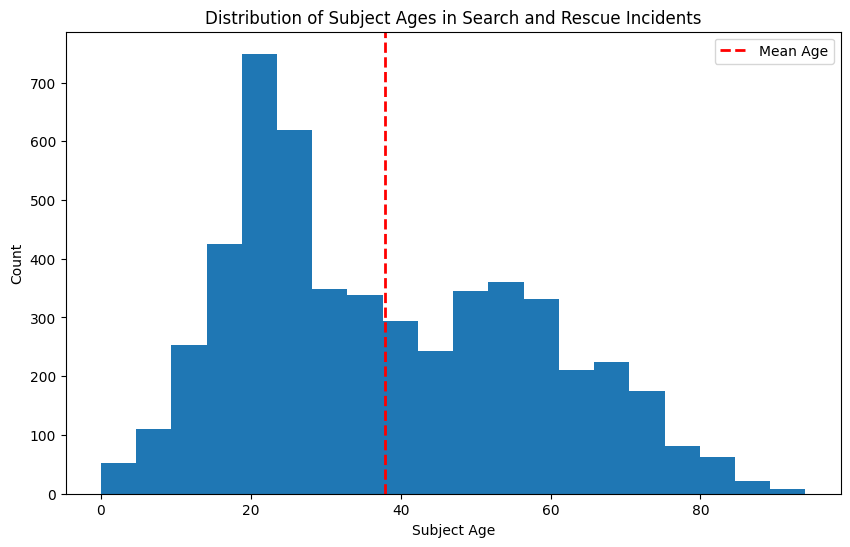

In [70]:
subject_ages = df['SUBJECT AGE'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(subject_ages, bins=20)
plt.axvline(np.mean(subject_ages), color='red', linestyle='--', linewidth=2, label='Mean Age')
plt.xlabel('Subject Age')
plt.ylabel('Count')
plt.title('Distribution of Subject Ages in Search and Rescue Incidents')
plt.legend()
plt.show()

<p>Next, we will look into the distribution of ages across all incidents. This revealed a very large occurence of subjects in their 20's.<p>

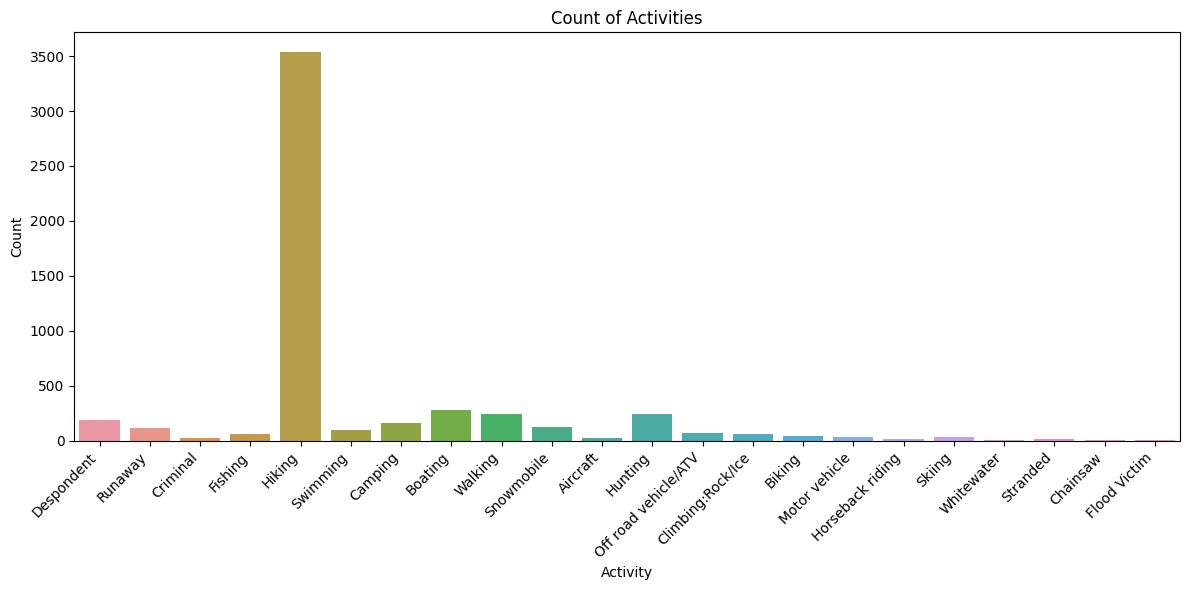

In [71]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ACTIVITY')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Count of Activities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<p>After looking at age we will dive into incident occurence by type of activity. This revealed the vast majority of incidents occured while hiking. <p>

/var/folders/dt/8gwg2xqn4nzbhpt624km6ktr0000gn/T/ipykernel_14921/542543497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INCIDENT START DATE'] = pd.to_datetime(df['INCIDENT START DATE'])
/var/folders/dt/8gwg2xqn4nzbhpt624km6ktr0000gn/T/ipykernel_14921/542543497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Month'] = df['INCIDENT START DATE'].dt.month
/var/folders/dt/8gwg2xqn4nzbhpt624km6ktr0000gn/T/ipykernel_14921/542543497.py:4: SettingWithCopyWarning: 
A value is trying to be se

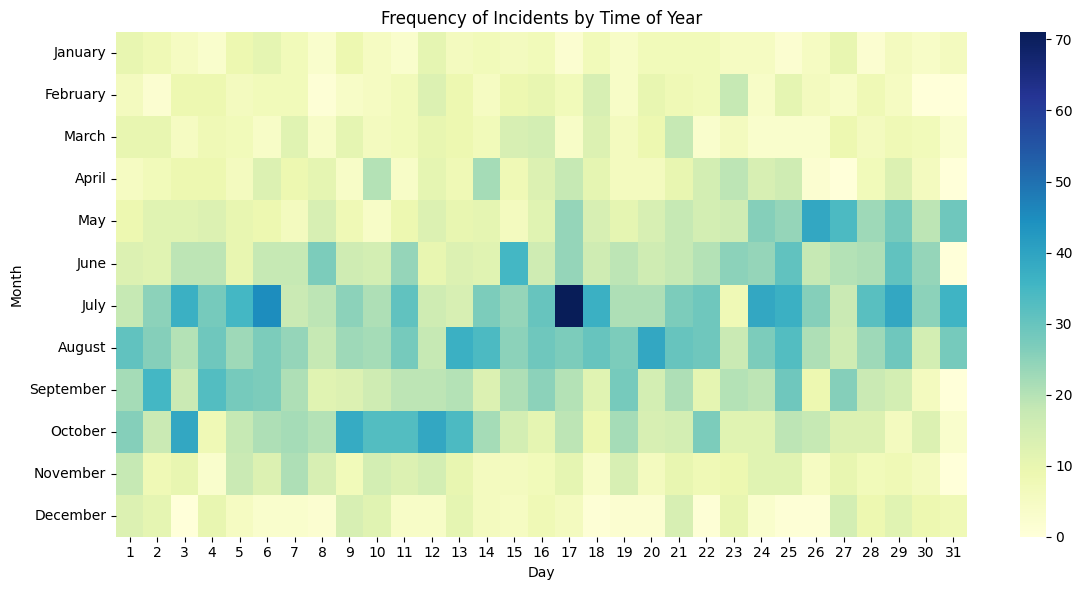

In [72]:
df['INCIDENT START DATE'] = pd.to_datetime(df['INCIDENT START DATE'])

df.loc[:, 'Month'] = df['INCIDENT START DATE'].dt.month
df.loc[:, 'Day'] = df['INCIDENT START DATE'].dt.day

incident_counts = df.groupby(['Month', 'Day']).size().reset_index(name='Count')

heatmap_data = incident_counts.pivot_table(index='Month', columns='Day', values='Count', fill_value=0)

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
heatmap_data.index = heatmap_data.index.map(month_names)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.xlabel('Day')
plt.ylabel('Month')
plt.title('Frequency of Incidents by Time of Year')
plt.tight_layout()
plt.show()

<p>This heatmap presents an interesting visualization for displaying frequency of events by time of the year. A trend I found interesting here is that the summer months present the highest number of incidents. I attributed this likely to more people recreating in the summer months as well as increased risk of heat injuries in these months. This also explained why there would be fewer incidents in winter months due to overall less recreating outdoors in the cold months.<p>

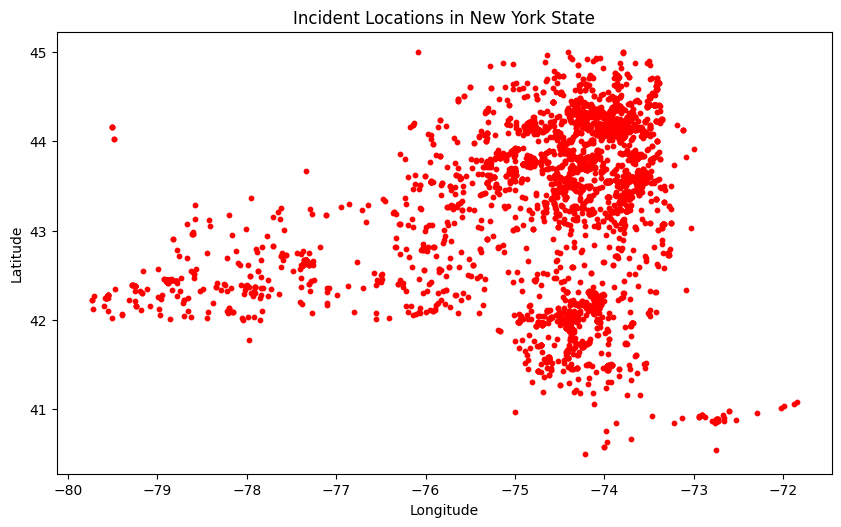

In [74]:
gdf = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df['LOCATION FOUND LONGITUDE'], df['LOCATION FOUND LATITUDE'])
)

ny_latitude_bounds = (40.4774, 45.0159)  
ny_longitude_bounds = (-79.7626, -71.1851)  

gdf_ny = gdf.cx[ny_longitude_bounds[0]:ny_longitude_bounds[1], ny_latitude_bounds[0]:ny_latitude_bounds[1]]

fig, ax = plt.subplots(figsize=(10, 10))
gdf_ny.plot(ax=ax, marker='o', color='red', markersize=10)

plt.title('Incident Locations in New York State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<p>Finally, I plotted all known incidents on a map using coordinates in the dataset. We are not extracting any actual numbers from this visualization but I wanted to create an aid for visualizing the distribution across the state. In future iterations I would spend more time making this map interactive.<p>

### Evaluation

<p>I used several peers to evaluate my visualizations and gather feedback on ease of understanding. The consensus was that I chose easy to interpret visualizations but the medium of a jupyter notebook was not intuitive to all users. I originally chose this medium to break down the steps of my data processing and visualization generation but can see how it would not be intuitive to someone unfamiliar with the format. Overall, I still find this medium to be useful for providing a broad and transparent overview of the dataset. In future iterations I would focus more on a single interactive element instead of multiple visualizations. While my foliu app is very interesting to look around with it could be further iterated to contain more data about incidents as well as offer additional interactive features like filtering.<p>